# Regression Analysis of MtCars
## Introduction

**Motor Trend Car Road Tests** data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973--74 models).

In this notebook, I wiil create multiple linear regression analysis of “mtcars” data and create a model to predict
mpg (miles per gallon) using best variables.

In [1]:
# Importing needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
%matplotlib inline

In [2]:
# Importing the dataset
df = pd.read_csv("mtcars.csv")
display(df)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


**Data Dictionary**

* **mpg** Miles/(US) gallon
* **cyl** Number of cylinders
* **disp** Displacement (cu.in.)
* **hp** Gross horsepower
* **drat** Rear axle ratio
* **wt** Weight (1000 lbs)
* **qsec** 1/4 mile time
* **vs** V/S
* **am** Transmission (0 = automatic, 1 = manual)
* **gear** Number of forward gears
* **carb** Number of carburetors

In [3]:
# Summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
cyl,32.0,6.187500,1.785922,4.000,4.00000,6.000,8.00,8.000
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
vs,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
am,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
gear,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


In [4]:
# Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [5]:
# Checking the missing values
print(str('Is there any NaN value in the dataset: '), df.isnull().values.any())

Is there any NaN value in the dataset:  False


As we can see here, the data is really clean, no outliers, no missing values, and have numeric data types.

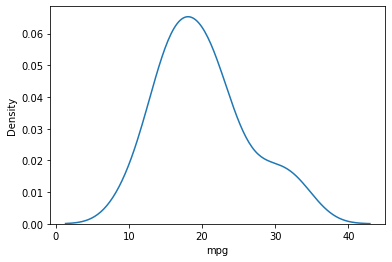

In [6]:
# Checking the distribution of mpg
fig, ax1 = plt.subplots()
sns.kdeplot(data=df, x="mpg", ax=ax1)

As we are interested in exploring the relationship between a set of variables and miles per gallon (mpg), so mpg is our dependent variable. So we plot dependent variable to check its distribution.

The distribution of mpg above is approximately normal and apparently the data does not contain any outliers.

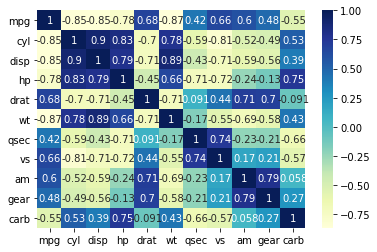

In [7]:
# Checking correlation between variables
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');

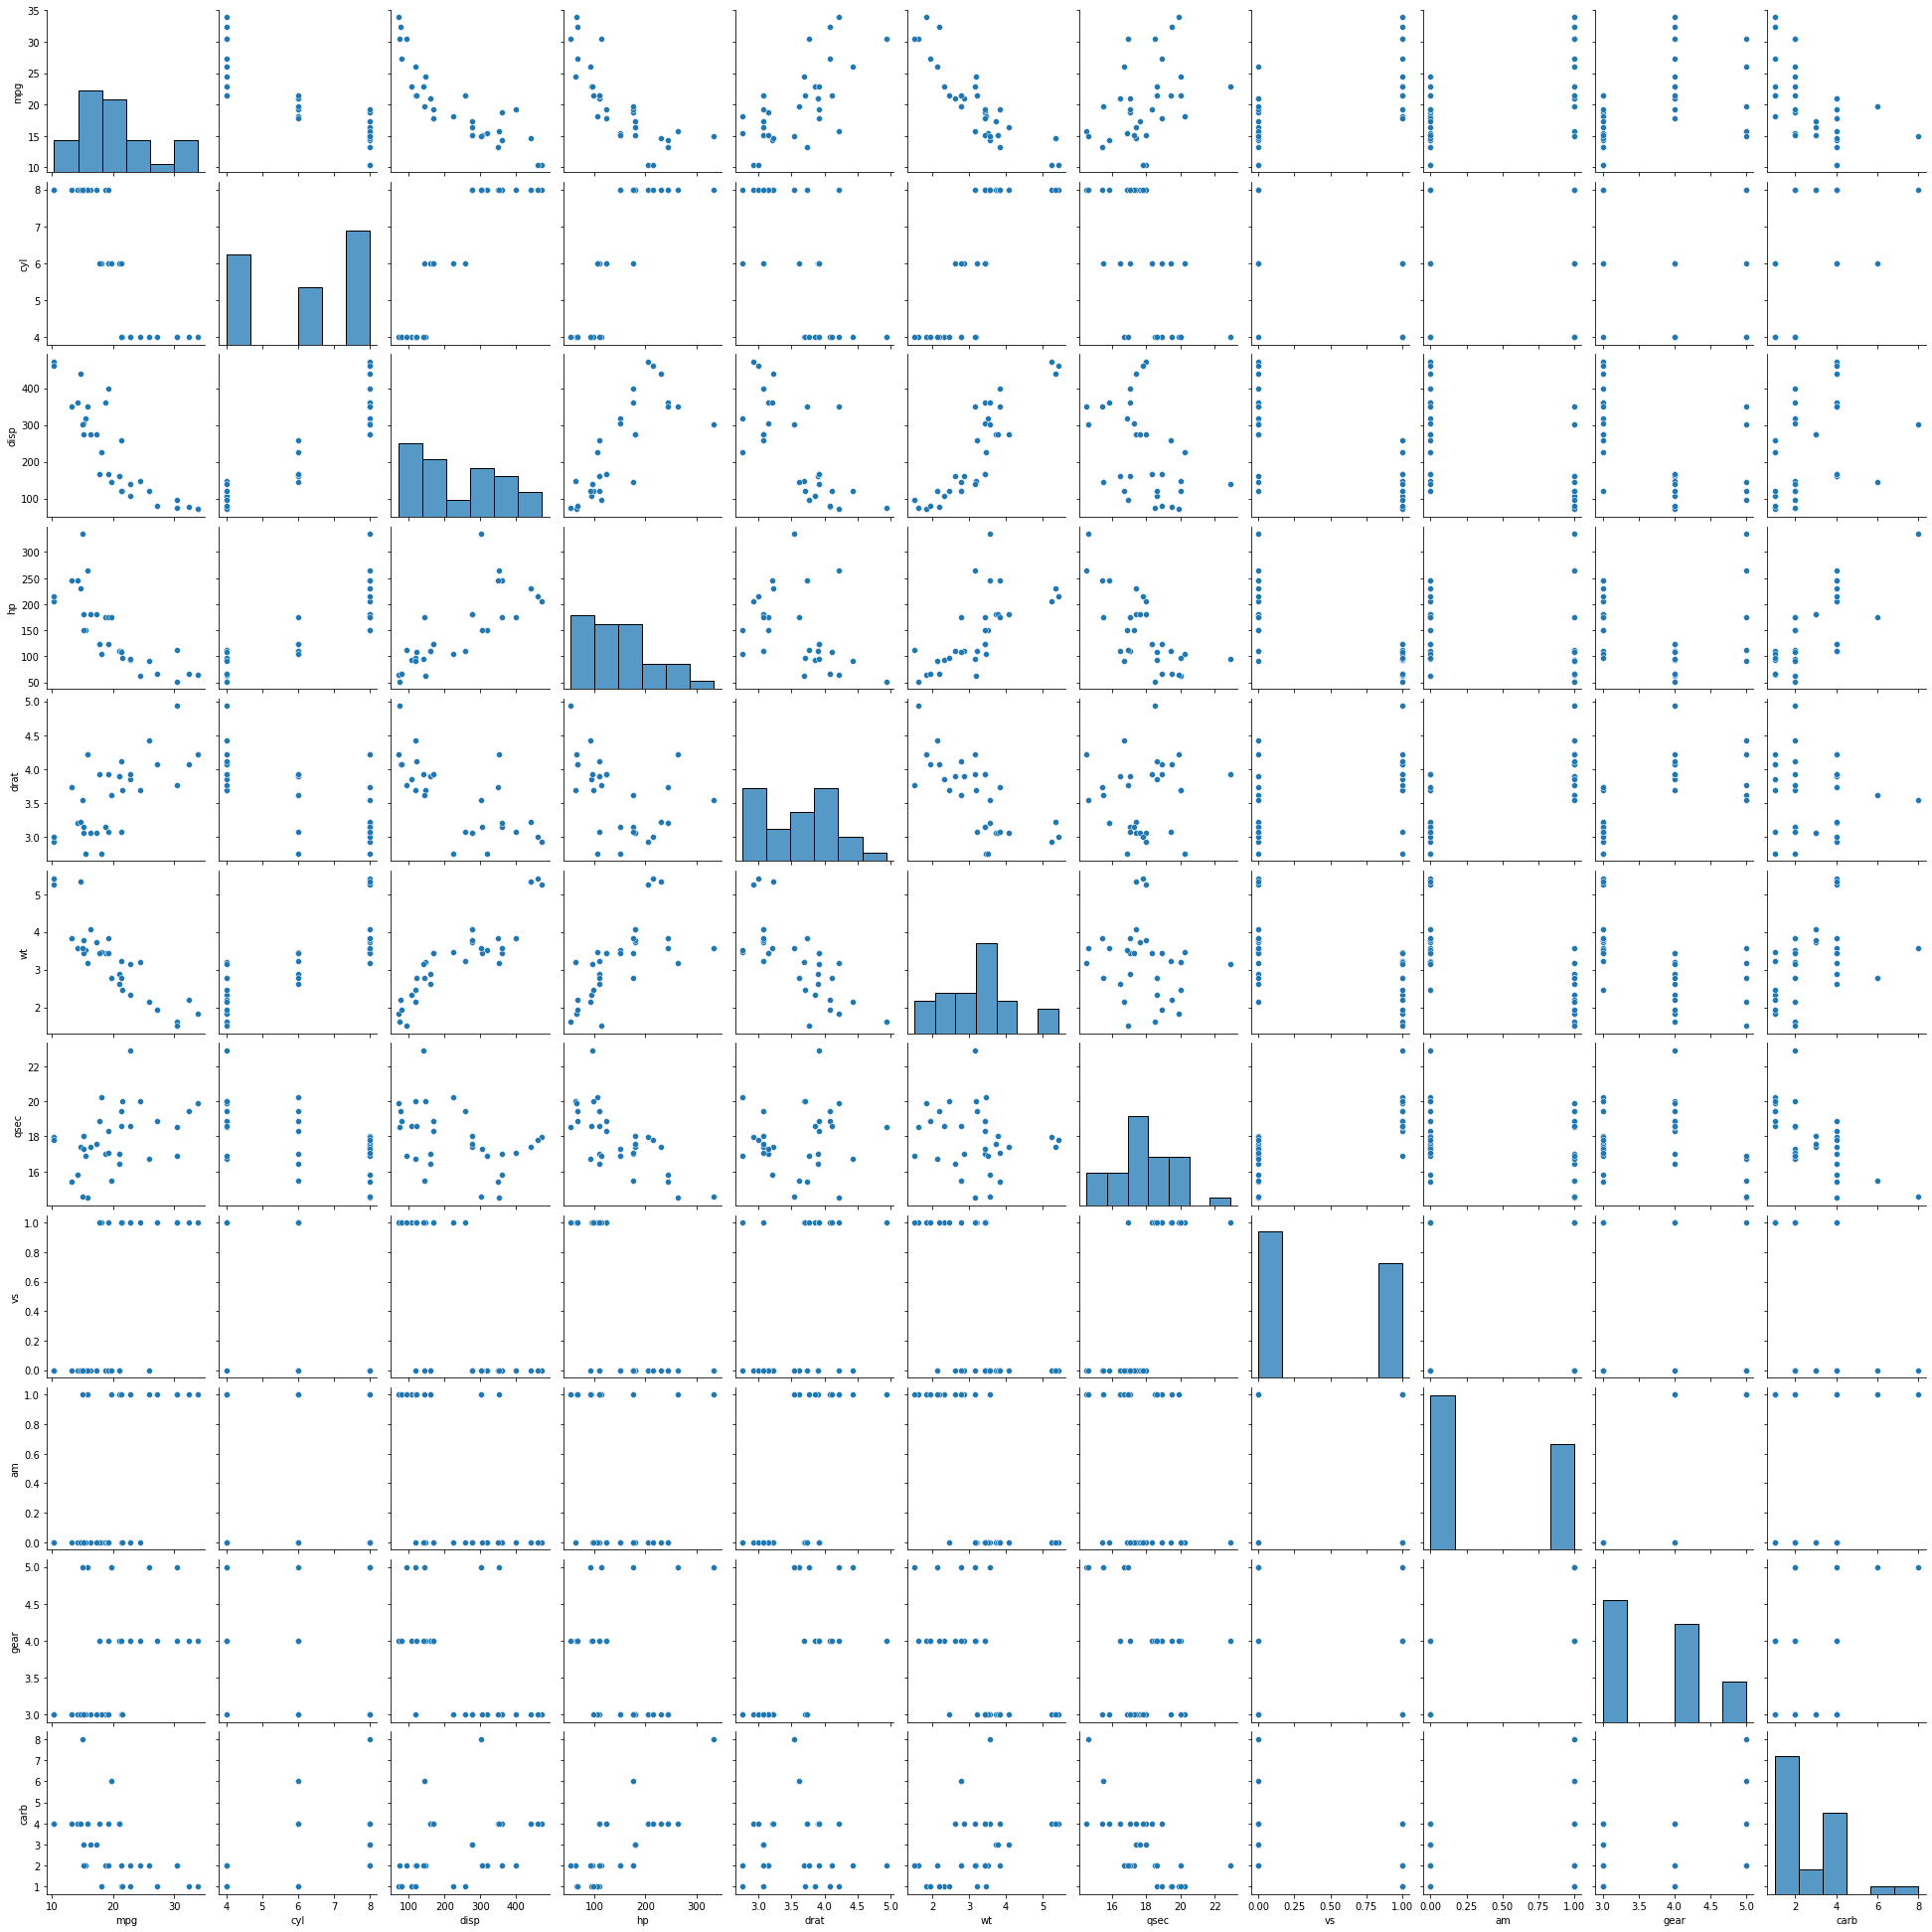

In [8]:
g = sns.pairplot(df, kind='scatter')

The correlation map and pairplot above show that variables such as *wt*, *cyl*, *disp*, and *hp* are highly correlated with the dependent variable *mpg*.

Hence, they should be included in the regression model. while looking at the correlation, it can be seen that *cyl* and *disp* are highly correlated with each other. In order to avoid the problem of collinearity only one variable from these two will be included in the model.

## Modeling

In [9]:
# Dependant variable:
y = df['mpg']
# Independant Variables:
X = df[['wt', 'cyl', 'hp']]

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [11]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Model's parameters
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  38.751787372865536
Model coefficients:  [-3.16697311 -0.94161681 -0.0180381 ]


And here's the model equation to predict MPG.

In [13]:
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + str('(%.2f' % reg.coef_[0]) + '*X1) + ' + str('(%.2f' % reg.coef_[1]) + '*X2) + ' +
      str('(%.2f' % reg.coef_[2]) + '*X3)')

y = 38.75 + (-3.17*X1) + (-0.94*X2) + (-0.02*X3)


In [14]:
y_head = reg.predict(X)

In [31]:
# Calculating MSE and R2 Score
print("Mean absolute error (MSE)     : %.3f" % np.mean(np.absolute(y_head - y)))
print("R2-score                      : %.3f" % r2_score(y_head, y) )

Mean absolute error (MSE)     : 1.845
R2-score                      : 0.814


RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. The lower the value, better is the performance of the model.

R-squared represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

We got the low MSE and high R2 score, it means our model is well enough.

## The Visualization of Prediction

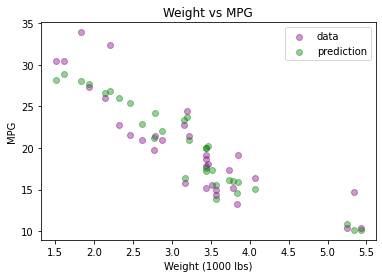

In [25]:
# Weight vs MPG
plt.scatter(X['wt'], y, color='purple', alpha=0.4, label='data')
plt.scatter(X['wt'], y_head, color='green', alpha=0.4, label='prediction')
plt.xlabel('Weight (1000 lbs)')
plt.ylabel('MPG')
plt.title('Weight vs MPG')
plt.legend()

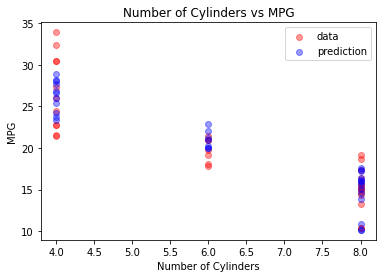

In [26]:
# Cylinders vs MPG
plt.scatter(X['cyl'], y, color='red', alpha=0.4, label='data')
plt.scatter(X['cyl'], y_head, color='blue', alpha=0.4, label='prediction')
plt.xlabel('Number of Cylinders')
plt.ylabel('MPG')
plt.title('Number of Cylinders vs MPG')
plt.legend()

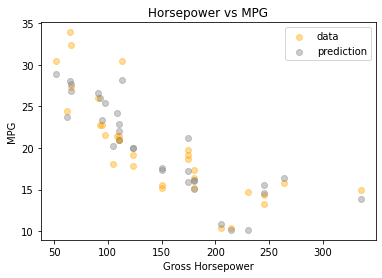

In [27]:
# Horsepower vs MPG
plt.scatter(X['hp'], y, color='orange', alpha=0.4, label='data')
plt.scatter(X['hp'], y_head, color='gray', alpha=0.4, label='prediction')
plt.xlabel('Gross Horsepower')
plt.ylabel('MPG')
plt.title('Horsepower vs MPG')
plt.legend()

Lastly, I saved the MPG prediction on a dataframe.

In [21]:
y_pred = pd.DataFrame(y_head, columns=['Estimated MPG'])
y_pred.head()

,Estimated MPG
0,22.820426
1,22.012848
2,25.960399
3,20.936077
4,17.167798
